# Analysing service based features of cities surrounding Baltic Sea
## Applied Data Science Capsone project 

### _By Alina Šerienė_
### _2020.06.01_

_Baltic Sea, due to its comparably cold climate was not usually a top holiday destination. Even citizens of surrounding countries usually preffered different places for holidays. As a result Baltic Sea does not have extensive analysis of tourism environment in the area._ 

_Recently Global Climate Change is making surrounding territories more and more atractive for tourism. Weather in surrounding territories is getting warmer but is not too hot as in  i.e. Egypt or Turkey, where during hot days temperature may even cause illnesses. Covid-19 crisis also made everyone to turn back to closer holiday spots._

_Shortage of analysis and information on Baltic Sea region tourism opportunities creates a need both for travelling people to know the area better and to find most attractive areas in the region as well as for business people to find investment opportunities in area having increasing potential._


## 1. Getting a list of Cities located around Baltic Sea 
_To reach research objective, it is needed to look into areas surrounding Baltic Sea. To do this, article from Wikipedia containing list of cities with some additional information was chosen as an initial source of data._

In [1]:
#install and import all libraries:

import pandas as pd

!pip install lxml
import lxml

import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy  # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
!pip install matplotlib 
import matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import *
import sys
import pylab as pl

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

!pip install folium  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from collections import defaultdict

#import seaborn as sns


print('Libraries imported.')


Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_and_towns_around_the_Baltic_Sea'
dfs = pd.read_html(url)[0]
df=pd.DataFrame(dfs)
df.head()

,City,Country,Founded,Population,Coordinates
0,Anklam,Germany,1296,12635,53°51′N 13°41′E﻿ / ﻿53.850°N 13.683°E
1,Baltijsk,Russia,1725,32697,54°39′N 19°55′E﻿ / ﻿54.650°N 19.917°E
2,Copenhagen,Denmark,1254,1295686,55°40′N 12°34′E﻿ / ﻿55.667°N 12.567°E
3,Darłowo,Poland,1312,14931,54°25′N 16°25′E﻿ / ﻿54.417°N 16.417°E
4,Elbląg,Poland,1246,124257,54°5′N 19°24′E﻿ / ﻿54.083°N 19.400°E


_As it can be seen, table contains two type of coordinates, where first column represents GPS coordinates and second one - Decimal ones with some additional notions. Going forward in analysis we will need decimal coordinates._


In [4]:
df[['GPS','Decimal']] = df['Coordinates'].str.split('/',expand=True)
df.head()

,City,Country,Founded,Population,Coordinates,GPS,Decimal
0,Anklam,Germany,1296,12635,53°51′N 13°41′E﻿ / ﻿53.850°N 13.683°E,53°51′N 13°41′E﻿,﻿53.850°N 13.683°E
1,Baltijsk,Russia,1725,32697,54°39′N 19°55′E﻿ / ﻿54.650°N 19.917°E,54°39′N 19°55′E﻿,﻿54.650°N 19.917°E
2,Copenhagen,Denmark,1254,1295686,55°40′N 12°34′E﻿ / ﻿55.667°N 12.567°E,55°40′N 12°34′E﻿,﻿55.667°N 12.567°E
3,Darłowo,Poland,1312,14931,54°25′N 16°25′E﻿ / ﻿54.417°N 16.417°E,54°25′N 16°25′E﻿,﻿54.417°N 16.417°E
4,Elbląg,Poland,1246,124257,54°5′N 19°24′E﻿ / ﻿54.083°N 19.400°E,54°5′N 19°24′E﻿,﻿54.083°N 19.400°E


In [5]:
df.drop(['Coordinates'], axis=1,inplace=True)
df.drop(['GPS'], axis=1,inplace=True)
df[['Latitude','Longitude']] = df['Decimal'].str.split(expand=True)
df.head()

,City,Country,Founded,Population,Decimal,Latitude,Longitude
0,Anklam,Germany,1296,12635,﻿53.850°N 13.683°E,﻿53.850°N,13.683°E
1,Baltijsk,Russia,1725,32697,﻿54.650°N 19.917°E,﻿54.650°N,19.917°E
2,Copenhagen,Denmark,1254,1295686,﻿55.667°N 12.567°E,﻿55.667°N,12.567°E
3,Darłowo,Poland,1312,14931,﻿54.417°N 16.417°E,﻿54.417°N,16.417°E
4,Elbląg,Poland,1246,124257,﻿54.083°N 19.400°E,﻿54.083°N,19.400°E


In [6]:
df.drop(['Decimal'], axis=1,inplace=True)

_After splitting Latitude and Longitude, it is needed to preprocess the data for further work. As a result, coluns are cleaned and type is changed into float._

In [7]:
df['Latitude'] = df['Latitude'].str.replace('°N', "")
df['Longitude'] = df['Longitude'].str.replace('°E', "")
df['Latitude'] = df['Latitude'].str.replace('°S', "")
df['Longitude'] = df['Longitude'].str.replace('°W', "")
df['Latitude'] = df['Latitude'].str.replace('\t', "")
df['Longitude'] = df['Longitude'].str.replace('\t', "")
df['Latitude'] = df['Latitude'].str.replace(' ', "")
df['Longitude'] = df['Longitude'].str.replace(' ', "")


df.head()

,City,Country,Founded,Population,Latitude,Longitude
0,Anklam,Germany,1296,12635,﻿53.850,13.683
1,Baltijsk,Russia,1725,32697,﻿54.650,19.917
2,Copenhagen,Denmark,1254,1295686,﻿55.667,12.567
3,Darłowo,Poland,1312,14931,﻿54.417,16.417
4,Elbląg,Poland,1246,124257,﻿54.083,19.400


In [8]:
df['Latitude'][0], df['Longitude'][0]

('\ufeff53.850', '13.683')

In [9]:
df['Latitude'] = df['Latitude'].str.replace('\ufeff', "") 

In [10]:
df['Latitude'][0], df['Longitude'][0]

('53.850', '13.683')

_Now Latitude and Longitude still are string type, so need to change it into float. In addition years founded and population also will be changed into numeric values._

In [11]:
df['Founded']=df['Founded'].str.replace("1865 (city 2002)","1865")
df['Founded']=df['Founded'].str.replace("15th century","1450")
df['Founded']=df['Founded'].str.replace("14th century","1350")
df['Founded']=df['Founded'].str.replace("1150s","1150")
df['Founded']=df['Founded'].str.replace("13th century","1250")

df['Latitude']=pd.to_numeric(df['Latitude'],downcast="float",errors='coerce')
df['Longitude']=pd.to_numeric(df['Longitude'],downcast="float",errors='coerce')
df['Founded']=pd.to_numeric(df['Founded'],downcast="integer",errors='coerce')
df['Population']=pd.to_numeric(df['Population'],downcast="integer",errors='coerce')
df.head()

,City,Country,Founded,Population,Latitude,Longitude
0,Anklam,Germany,1296.0,12635,53.849998,13.683
1,Baltijsk,Russia,1725.0,32697,54.650002,19.917
2,Copenhagen,Denmark,1254.0,1295686,55.667000,12.567
3,Darłowo,Poland,1312.0,14931,54.417000,16.417
4,Elbląg,Poland,1246.0,124257,54.083000,19.400


---

# 2. Checking coordinates and plotting the map
_Following code will check coordinates provided in Wikipedia article from Geopy library and using the map we will decide which coordinates to use going forward in the project._

In [12]:
df['Latitude_2']=""
df['Longitude_2']=""
n=len(df)

for i in range(n):
    address = df['City'][i]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    df['Latitude_2'][i] = location.latitude
    df['Longitude_2'][i] = location.longitude
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,City,Country,Founded,Population,Latitude,Longitude,Latitude_2,Longitude_2
0,Anklam,Germany,1296.0,12635,53.849998,13.683,53.8561,13.6881
1,Baltijsk,Russia,1725.0,32697,54.650002,19.917,54.6437,19.8942
2,Copenhagen,Denmark,1254.0,1295686,55.667000,12.567,55.6867,12.5701
3,Darłowo,Poland,1312.0,14931,54.417000,16.417,54.4225,16.4093
4,Elbląg,Poland,1246.0,124257,54.083000,19.400,54.1989,19.4411


In [13]:
address = 'Baltic sea'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
Latitude = location.latitude
Longitude = location.longitude
Latitude, Longitude

(56.0, 18.0)

_Lets create a map with booth coordinates and see which ones are more correct._

In [14]:
# create map using latitude and longitude values
mapfol = folium.Map(location=[Latitude, Longitude], zoom_start=5)

# add markers to mapfol
for lat, lng, city, country in zip(df['Latitude'], df['Longitude'], df['City'], df['Country']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(mapfol)  
, 
for lat, lng, city, country in zip(df['Latitude_2'], df['Longitude_2'], df['City'], df['Country']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(mapfol)  

mapfol

_As it can be seen in the map, coordinates in initial list seem to be more correct, as Geopy ones crate outliers in see non-surrounding ares. As a result, these coordinates will be used going forward in the project._

In [15]:
df_correct=df.drop(['Latitude_2','Longitude_2'], axis=1)
df_correct.head()

,City,Country,Founded,Population,Latitude,Longitude
0,Anklam,Germany,1296.0,12635,53.849998,13.683
1,Baltijsk,Russia,1725.0,32697,54.650002,19.917
2,Copenhagen,Denmark,1254.0,1295686,55.667000,12.567
3,Darłowo,Poland,1312.0,14931,54.417000,16.417
4,Elbląg,Poland,1246.0,124257,54.083000,19.400


## 3. Venues information by city

_For analysis venues data is used from Foursquare API. As we are analysing cities, 10 km radius is selected, to represent most of venues within the city or at least the most important ones. Response is limited to 300 entries and this is enough as none of cities have equally 300 venues in the list._ 

In [16]:
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID3, 
            CLIENT_SECRET3, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude',            
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [17]:
bs_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
bs_venues.head()

Anklam
Baltijsk
Copenhagen
Darłowo
Elbląg
Flensburg
Frombork
Gdańsk
Gdynia
Greifswald
Gävle
Haapsalu
Halmstad
Hamina
Hanko
Helsingborg
Helsingør
Helsinki
Härnösand
Jūrmala
Kaliningrad
Kalajoki
Kalmar
Kamień Pomorski
Kappeln
Karlskrona
Kemi
Kiel
Kirkkonummi
Klaipėda
Køge
Kołobrzeg
Kokkola
Kotka
Kronstadt
Kuressaare
Kärdla
Łeba
Liepāja
Loviisa
Lübeck
Luleå
Lund
Maardu
Malbork
Malmö
Mariehamn
Misdroy
Naantali
Narva-Jõesuu
Norrköping
Nowe Warpno
Nyköping
Nykøbing Falster
Næstved
Oskarshamn
Oulu
Palanga
Pori
Porvoo
Primorsk
Pärnu
Raahe
Rauma
Riga
Rostock
Rønne
Saint Petersburg
Sassnitz
Saulkrasti
Sestroretsk
Sillamäe
Skellefteå
Słupsk
Sopot
Sosnovy Bor
Stockholm
Stralsund
Sundsvall
Szczecin
Świnoujście
Tallinn
Tornio
Trzebiatów
Turku
Ueckermünde
Umeå
Uppsala
Usedom
Ustka
Uusikaupunki
Vaasa
Ventspils
Visby
Vyborg
Wismar
Wolgast
Wolin
Ystad
Örnsköldsvik


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket
3,Anklam,53.849998,13.683,Famila,53.858687,13.693225,Grocery Store
4,Anklam,53.849998,13.683,Bahnhof Anklam,53.856125,13.701395,Train Station


In [18]:
wo_duplicates=bs_venues.drop_duplicates()

bs_venues.shape, wo_duplicates.shape

((4951, 7), (4951, 7))

In [19]:
test=bs_venues.groupby('City').count()
test

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Anklam,9,9,9,9,9,9
Baltijsk,27,27,27,27,27,27
Copenhagen,100,100,100,100,100,100
Darłowo,8,8,8,8,8,8
Elbląg,15,15,15,15,15,15
Flensburg,67,67,67,67,67,67
Frombork,8,8,8,8,8,8
Gdańsk,100,100,100,100,100,100
Gdynia,100,100,100,100,100,100


In [20]:
test.shape

(100, 6)

_Next step is to get higher level categories as ungrouped venues categories provide too detailed view and would not help to make broad understanding on each city._

In [21]:


#GET https://api.foursquare.com/v2/venues/categories
urlcat = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID3, 
            CLIENT_SECRET3, 
            VERSION)
            
# a dictionary to store subcategory (key) and all of its possible parents
SUBCATEGORIES = {}

def subcategorize(cat, prev):
    if cat.get('categories', False):
        
        lvl = len(prev)-1
        for subcat in cat['categories']:
            
            child = subcat['name']
            subcategorize(subcat, prev+[child])
            if child not in SUBCATEGORIES:
                SUBCATEGORIES[child] = [(prev[0], 0)]
                
            for i in range(1, lvl+1):
                SUBCATEGORIES[child].append((prev[i], i))

#fetch categories from api
response = requests.get(urlcat).json()

#subcategorize each category
for cat in response['response']['categories']:
    name = cat['name']
    subcategorize(cat, [name])

#populate a dataframe from SUBCATEGORIES dictionary
catsdf = pd.DataFrame(columns = ['venue', 'venue_category', 'level'])
for k, v in SUBCATEGORIES.items():
    for sub, lvl in v:
        catsdf.loc[len(catsdf)] = (k, sub, lvl)

catsdf.head()

,venue,venue_category,level
0,Amphitheater,Arts & Entertainment,0
1,Aquarium,Arts & Entertainment,0
2,Arcade,Arts & Entertainment,0
3,Art Gallery,Arts & Entertainment,0
4,Bowling Alley,Arts & Entertainment,0


_Foursquare API categories dictionary is made in reverse logic. As a result, to get parent category some itterations have to be made to reach the final parent category, which combine similar venue types within it._

_Foursquare has 10 unique master categories in their dictionary._

In [22]:
par_cat=catsdf.loc[catsdf['level'] == 0,'venue_category']
par_cat.unique()

array(['Arts & Entertainment', 'College & University', 'Event', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
       'Professional & Other Places', 'Residence', 'Shop & Service',
       'Travel & Transport'], dtype=object)

In [23]:
bs_venues_ext = pd.merge(bs_venues,  
                     catsdf,  
                     how ='left',
                     left_on=['Venue Category'], right_on=['venue']) 
bs_venues_ext.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,venue_category,level
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore,Drugstore,Shop & Service,0
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore,Drugstore,Shop & Service,0
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Shop & Service,0
3,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Food & Drink Shop,1
4,Anklam,53.849998,13.683,Famila,53.858687,13.693225,Grocery Store,Grocery Store,Shop & Service,0


In [24]:
grouped=bs_venues_ext.groupby('level').count()
grouped

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,venue_category
level,,,,,,,,,
0,4944,4944,4944,4944,4944,4944,4944,4944,4944
1,1245,1245,1245,1245,1245,1245,1245,1245,1245
2,101,101,101,101,101,101,101,101,101


_It can be seen, that we will need to make three iterations to get final categories for all venue categories:_

In [25]:
n=len(bs_venues_ext)
for i in range(n):
    if bs_venues_ext['level'][i]!=0:
        bs_venues_ext2=pd.merge(bs_venues_ext,  
                     catsdf,  
                     how ='left',
                     left_on=['venue_category'], right_on=['venue'])
        
bs_venues_ext2.head()        

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue_x,venue_category_x,level_x,venue_y,venue_category_y,level_y
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Shop & Service,0,NaN,NaN,NaN
3,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Food & Drink Shop,1,Food & Drink Shop,Shop & Service,0
4,Anklam,53.849998,13.683,Famila,53.858687,13.693225,Grocery Store,Grocery Store,Shop & Service,0,NaN,NaN,NaN


In [26]:
n=len(bs_venues_ext2)
for i in range(n):
    if bs_venues_ext2['level_y'][i]==1:
        bs_venues_ext3=pd.merge(bs_venues_ext2,  
                     catsdf,  
                     how ='left',
                     left_on=['venue_category_y'], right_on=['venue'])
bs_venues_ext3.head()        

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue_x,venue_category_x,level_x,venue_y,venue_category_y,level_y,venue,venue_category,level
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Food & Drink Shop,1,Food & Drink Shop,Shop & Service,0,NaN,NaN,NaN
4,Anklam,53.849998,13.683,Famila,53.858687,13.693225,Grocery Store,Grocery Store,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
bs_venues_ext3.loc[bs_venues_ext3['level'] == 0, 'Parent_cat'] = bs_venues_ext3['venue_category'] 
bs_venues_ext3.loc[bs_venues_ext3['level_y'] == 0, 'Parent_cat'] = bs_venues_ext3['venue_category_y'] 
bs_venues_ext3.loc[bs_venues_ext3['level_x'] == 0, 'Parent_cat'] = bs_venues_ext3['venue_category_x'] 

bs_venues_ext3.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue_x,venue_category_x,level_x,venue_y,venue_category_y,level_y,venue,venue_category,level,Parent_cat
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore,Drugstore,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
3,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Food & Drink Shop,1,Food & Drink Shop,Shop & Service,0,NaN,NaN,NaN,Shop & Service
4,Anklam,53.849998,13.683,Famila,53.858687,13.693225,Grocery Store,Grocery Store,Shop & Service,0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service


_When we have final categories in place, we should use pivot table function to get aggregated count of venues for each city._

_To save Foursquare data and avoid repeating the request, data is being saved_

In [30]:
bs_venues_ext3.to_csv(r'bs_venues_ext3.csv',index=False)

# 3. Modelling and analysis

In [16]:
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors 
import math
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

In [17]:
bs_venues_ext3=pd.read_csv('bs_venues_ext3.csv')  
bs_venues_ext3.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue_x,venue_category_x,level_x,venue_y,venue_category_y,level_y,venue,venue_category,level,Parent_cat
0,Anklam,53.849998,13.683,Rossmann,53.855387,13.688321,Drugstore,Drugstore,Shop & Service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
1,Anklam,53.849998,13.683,dm-drogerie markt,53.859442,13.692272,Drugstore,Drugstore,Shop & Service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
2,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Shop & Service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Shop & Service
3,Anklam,53.849998,13.683,Lidl,53.844217,13.712386,Supermarket,Supermarket,Food & Drink Shop,1.0,Food & Drink Shop,Shop & Service,0.0,NaN,NaN,NaN,Shop & Service
4,Anklam,53.849998,13.683,Flugplatz Anklam,53.855356,13.689145,Airport,Airport,Travel & Transport,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Travel & Transport


_It was decided to make a summary by count of each city venues within each parent category and use it as the dataset for clustering. To do this, pivot_table is used._

In [18]:
pivotsum=pd.pivot_table(bs_venues_ext3,values=['Venue'], columns=['Parent_cat'], aggfunc='count')

pivotsum.fillna(0, inplace=True)
pivotsum.head()

Parent_cat,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Venue,675,3,2108,498,1269,58,1,1302,520


In [19]:
pivot=pd.pivot_table(bs_venues_ext3,values=['Venue'], index=['City'], columns=['Parent_cat'], aggfunc='count')
pivot.columns = pivot.columns.to_series().str.join('_')
pivot.reset_index(inplace=True)
pivot.fillna(0, inplace=True)
pivot.head()

,City,Venue_Arts & Entertainment,Venue_College & University,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Residence,Venue_Shop & Service,Venue_Travel & Transport
0,Anklam,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0
1,Baltijsk,8.0,0.0,6.0,1.0,10.0,0.0,0.0,4.0,7.0
2,Copenhagen,12.0,0.0,43.0,21.0,26.0,2.0,0.0,14.0,4.0
3,Darłowo,2.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,2.0
4,Elbląg,1.0,0.0,9.0,1.0,0.0,0.0,0.0,3.0,1.0


## 3.1. Clusterring

_The following code will group cities into three clusters. Extended description on selecting three clusters is provided in project report._

In [20]:
# set number of clusters
kclusters = 3

pivot_clustering = pivot.drop(['City','Venue_Residence','Venue_College & University'],1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pivot_clustering)

labels = kmeans.labels_

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 2, 2, 0, 2, 1, 1, 0], dtype=int32)

In [21]:
pivot["Clusters"] = labels
df_correct['City age']=2020-df_correct['Founded']
pivot.reindex()
df_fin = pd.merge(df_correct,  
                     pivot,  
                     on ='City',  
                     how ='left') 

df_fin.drop(['Venue_Residence','Venue_College & University'],1, inplace=True)

df_fin['All_venues']=df_fin['Venue_Arts & Entertainment']+df_fin['Venue_Food']+df_fin['Venue_Nightlife Spot']+df_fin['Venue_Outdoors & Recreation']+df_fin['Venue_Professional & Other Places']+df_fin['Venue_Shop & Service']+df_fin['Venue_Travel & Transport']
#df_fin['C_City']=df_fin['Clusters'].astype(str)+df_fin['City']
df_fin.head()

,City,Country,Founded,Population,Latitude,Longitude,City age,Venue_Arts & Entertainment,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Shop & Service,Venue_Travel & Transport,Clusters,All_venues
0,Anklam,Germany,1296.0,12635,53.849998,13.683,724.0,1.0,1.0,0.0,0.0,0.0,8.0,4.0,2,14.0
1,Baltijsk,Russia,1725.0,32697,54.650002,19.917,295.0,8.0,6.0,1.0,10.0,0.0,4.0,7.0,2,36.0
2,Copenhagen,Denmark,1254.0,1295686,55.667000,12.567,766.0,12.0,43.0,21.0,26.0,2.0,14.0,4.0,1,122.0
3,Darłowo,Poland,1312.0,14931,54.417000,16.417,708.0,2.0,2.0,0.0,3.0,0.0,3.0,2.0,2,12.0
4,Elbląg,Poland,1246.0,124257,54.083000,19.400,774.0,1.0,9.0,1.0,0.0,0.0,3.0,1.0,2,15.0


In [22]:
df_fin.shape

(100, 16)

_Map clearly indicates, that all clusters are quite spread between different countries and cities, which notifies that model may help to choose best city for each traveller in each country. But lets look into clusters more deeply._

In [23]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_fin['Latitude'], df_fin['Longitude'], df_fin['City'], df_fin['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

_In order to look into clustering supporting data visually, it is needed to reconstruct it. This will be done using PCA in order to transform data into 3d dataset._

In [24]:
from sklearn.decomposition import PCA 

pca = PCA(3) 
pca.fit(pivot_clustering) 
  
pca_data = pd.DataFrame(pca.transform(pivot_clustering)) 
print(pca_data.head())

           0         1         2
0 -25.397108 -1.802640  0.224094
1 -15.941492  7.884675  2.548504
2  28.440259  2.964757  3.999654
3 -24.302863  2.503299  4.057912
4 -19.974241 -2.740824  7.700234


In [25]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   

# number of steps to taken generate n(kclusters) colors  
skips = math.floor(len(colors[5 : -5])/kclusters) 
cluster_colors = colors[5 : -5 : skips] 

_At first, we will plot unclustered picture to see if we can identify potential number of clusters by eye._

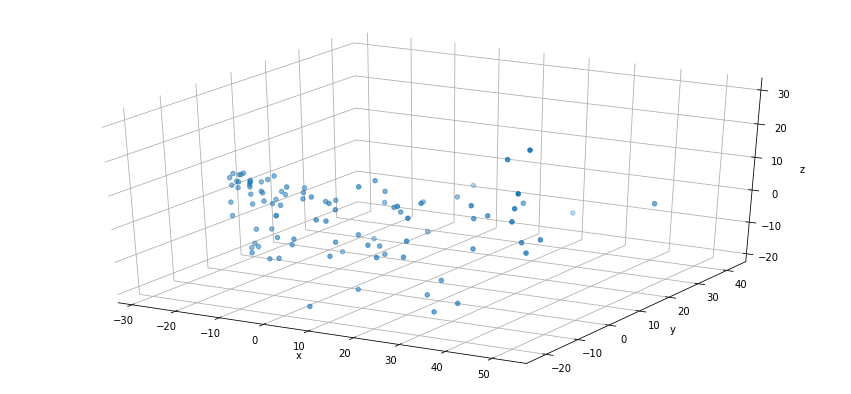

In [26]:

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np
   
fig = plt.figure(figsize = (15,7)) 


ax = fig.gca(projection='3d')
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           edgecolors=None) 
   
plt.show() 

_As initial dataset does not propose potential number of clusters, and different testing options provide best outcome of 3 clusters, this option is remaining one._

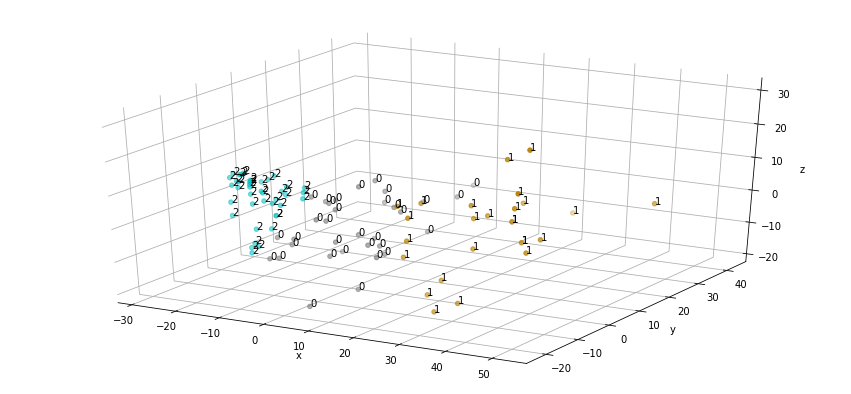

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize = (15,7)) 


ax = fig.gca(projection='3d')
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
           c = list(map(lambda label : cluster_colors[label],
                        kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 10, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

In [52]:
df_fin.describe().round(2)

,Founded,Population,Latitude,Longitude,City age,Venue_Arts & Entertainment,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Shop & Service,Venue_Travel & Transport,Clusters,All_venues
count,99.00,100.00,100.00,100.00,99.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00
mean,1445.60,167985.39,57.73,19.19,574.40,6.75,21.08,4.98,12.69,0.58,13.02,5.2,1.08,64.30
std,250.28,576649.65,3.46,5.45,250.28,7.21,18.06,5.88,12.51,1.02,9.73,4.1,0.86,43.43
min,897.00,1170.00,53.42,9.43,61.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00
25%,1254.50,15087.75,54.49,14.27,398.50,2.00,6.00,0.00,3.00,0.00,5.75,2.0,0.00,25.75
50%,1353.00,38830.50,56.95,18.67,667.00,4.00,16.00,3.00,8.00,0.00,11.50,4.5,1.00,58.00
75%,1621.50,85442.25,60.13,23.80,765.50,10.00,30.25,8.25,20.00,1.00,20.00,7.0,2.00,96.50
max,1959.00,5323300.00,65.83,30.32,1123.00,36.00,77.00,25.00,63.00,4.00,41.00,24.0,2.00,151.00


In [29]:
import seaborn as sns 

In [30]:
summary=pd.pivot_table(df_fin,values=['All_venues'], 
                       index=['Clusters'], aggfunc=[np.mean,np.sum,'count']).round(2)

summary.columns = summary.columns.to_series().str.join('_')

summary.rename(columns={'mean_All_venues':'All venues mean within cluster',
                     'sum_All_venues':'All venues count in cluster',
                     'count_All_venues':'Cities count in cluster'}, 
                 inplace=True)

#summary.reset_index(inplace=True)
#summary.fillna(0, inplace=True)
#,'Population','City age','Venue_Arts & Entertainment','Venue_Food', 'Venue_Nightlife Spot','Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
#'Venue_Shop & Service', 'Venue_Travel & Transport'

summary


,All venues mean within cluster,All venues count in cluster,Cities count in cluster
Clusters,,,
0,70.33,2321.0,33
1,123.54,3212.0,26
2,21.88,897.0,41


In [31]:
avg=pd.pivot_table(df_fin,values=['Population','City age','Venue_Arts & Entertainment',
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport','All_venues'], 
                       index=['Clusters'], aggfunc='mean').round(0)
avg.columns = avg.columns.to_series().str.join('')
avg.transpose()
avg.rename(columns={'Venue_Arts & Entertainment':'Arts & Entertainment',
                     'Venue_Food':'Food',
                     'Venue_Nightlife Spot':'Nightlife Spot',
                     'Venue_Outdoors & Recreation':'Outdoors & Recreation',
                     'Venue_Professional & Other Places':'Professional & Other',
                     'Venue_Shop & Service':'Shop & Service',
                     'Venue_Travel & Transport':'Travel & Transport',
                    'All_venues':'All venues'                
                    }, 
                 inplace=True)
avg

,All venues,City age,Population,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other,Shop & Service,Travel & Transport
Clusters,,,,,,,,,,
0,70.0,540.0,71153.0,8.0,21.0,5.0,14.0,0.0,16.0,6.0
1,124.0,580.0,518343.0,13.0,46.0,12.0,26.0,1.0,18.0,7.0
2,22.0,600.0,23746.0,2.0,5.0,1.0,4.0,0.0,7.0,3.0


In [32]:
my_colours=['#B9F6CA','#F4FF81','#00897B','#F57F17','#FFCC80']

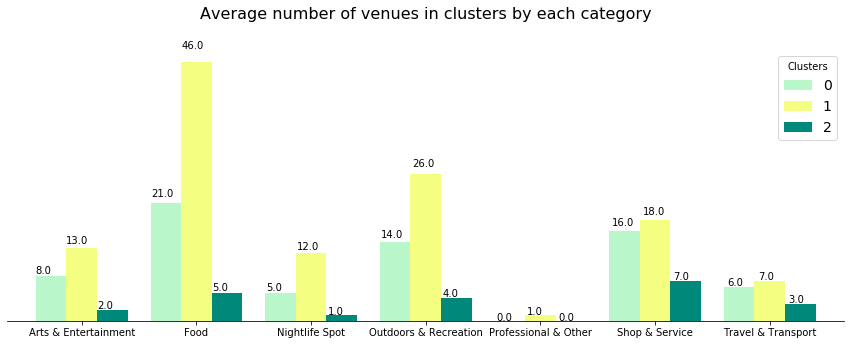

In [33]:
avg_p=avg.drop(['All venues','City age','Population'], axis=1)
avg_p=avg_p.transpose()

ax1 = avg_p.plot(kind='bar',
                  figsize = (15,5),
                  width=0.8,
                  color=(my_colours),
                  rot=0)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.legend(fontsize=14, title='Clusters')
ax1.get_yaxis().set_visible(False)
ax1.set_title('Average number of venues in clusters by each category', fontsize=16, pad=30)


for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))


In [34]:
sumall=pd.pivot_table(df_fin,values=['Venue_Arts & Entertainment',
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport'], 
                       index=['Clusters'], aggfunc='sum').round(0)
sumall.columns = sumall.columns.to_series().str.join('')
sumall=sumall.transpose()
sumall.rename(index={'Venue_Arts & Entertainment':'Arts & Entertainment',
                     'Venue_Food':'Food',
                     'Venue_Nightlife Spot':'Nightlife Spot',
                     'Venue_Outdoors & Recreation':'Outdoors & Recreation',
                     'Venue_Professional & Other Places':'Professional & Other',
                     'Venue_Shop & Service':'Shop & Service',
                     'Venue_Travel & Transport':'Travel & Transport'
                    }, 
                 inplace=True)

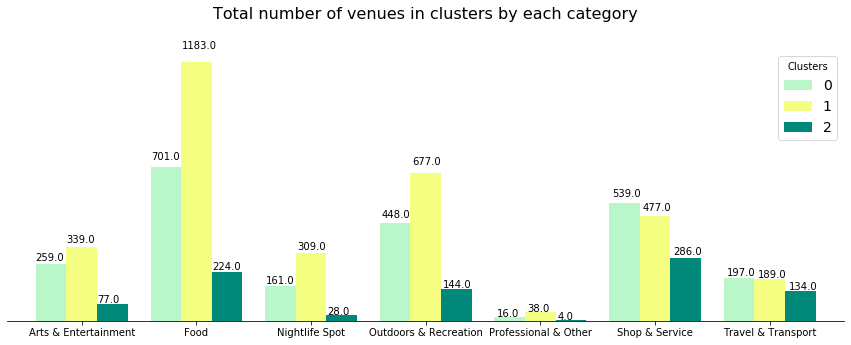

In [35]:
ax1 = sumall.plot(kind='bar',
                  figsize = (15,5),
                  width=0.8,
                  color=(my_colours),
                  rot=0)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.legend(fontsize=14, title='Clusters')
ax1.get_yaxis().set_visible(False)
ax1.set_title('Total number of venues in clusters by each category', fontsize=16, pad=30)


for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))


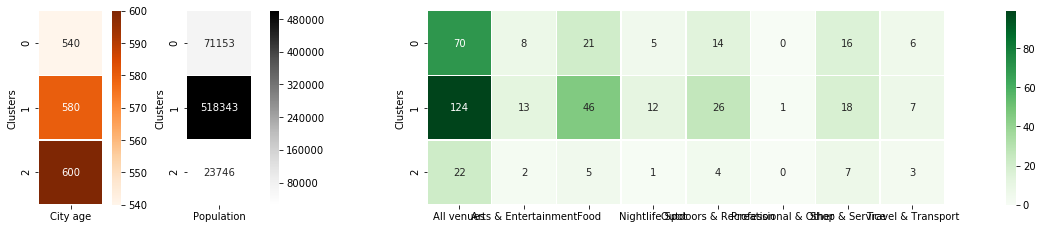

In [36]:
avgv=pd.DataFrame(avg.drop(['Population', 'City age'], axis=1))
avgp=pd.DataFrame(avg['Population'])
avga=pd.DataFrame(avg['City age'])


fig=plt.Figure(figsize = (22,25))
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(631)
ax3 = fig.add_subplot(661)

# We use ax parameter to tell seaborn which subplot to use for this plot
one=sns.heatmap(avgv, cmap='Greens', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax1, robust=True)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
two=sns.heatmap(avgp, cmap='Greys', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax2, robust=True)
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
thr=sns.heatmap(avga, cmap='Oranges', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax3)
bottom, top = thr.get_ylim()
thr.set_ylim(bottom + 0.5, top - 0.5)

fig



Text(0.5, 1, '2 Cluster')

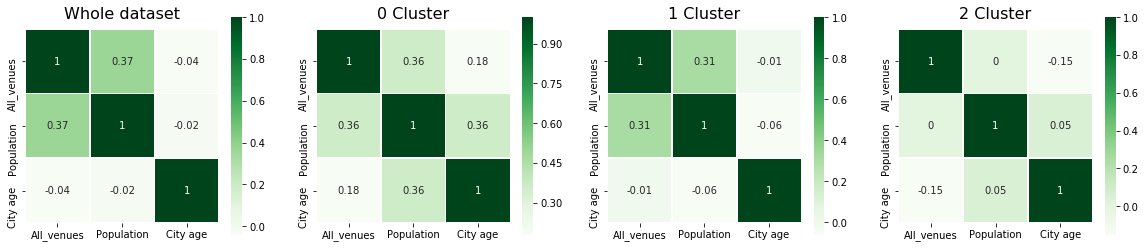

In [37]:
clu0=df_fin.loc[df_fin['Clusters'] == 0][['City','All_venues','Population','City age']]
clu1=df_fin.loc[df_fin['Clusters'] == 1][['City','All_venues','Population','City age']]
clu2=df_fin.loc[df_fin['Clusters'] == 2][['City','All_venues','Population','City age']]
clu_all=df_fin[['City','All_venues','Population','City age']]

fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

# generating correlation heatmap 
one=sns.heatmap(clu_all.corr().round(2), annot = True, linewidths=0.5, ax=ax1, square=True, cmap='Greens') 
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
one.set_title('Whole dataset', fontsize=16, pad=10)

two=sns.heatmap(clu0.corr().round(2), annot = True, linewidths=0.5, ax=ax2, square=True, cmap='Greens') 
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
two.set_title('0 Cluster', fontsize=16, pad=10)

thr=sns.heatmap(clu1.corr().round(2), annot = True, linewidths=0.5, ax=ax3, square=True, cmap='Greens') 
bottom, top = thr.get_ylim()
thr.set_ylim(bottom + 0.5, top - 0.5)
thr.set_title('1 Cluster', fontsize=16, pad=10)

four=sns.heatmap(clu2.corr().round(2), annot = True, linewidths=0.5, ax=ax4, square=True, cmap='Greens') 
bottom, top = four.get_ylim()
four.set_ylim(bottom + 0.5, top - 0.5)
four.set_title('2 Cluster', fontsize=16, pad=10)



Text(0.5, 1, '2 Cluster')

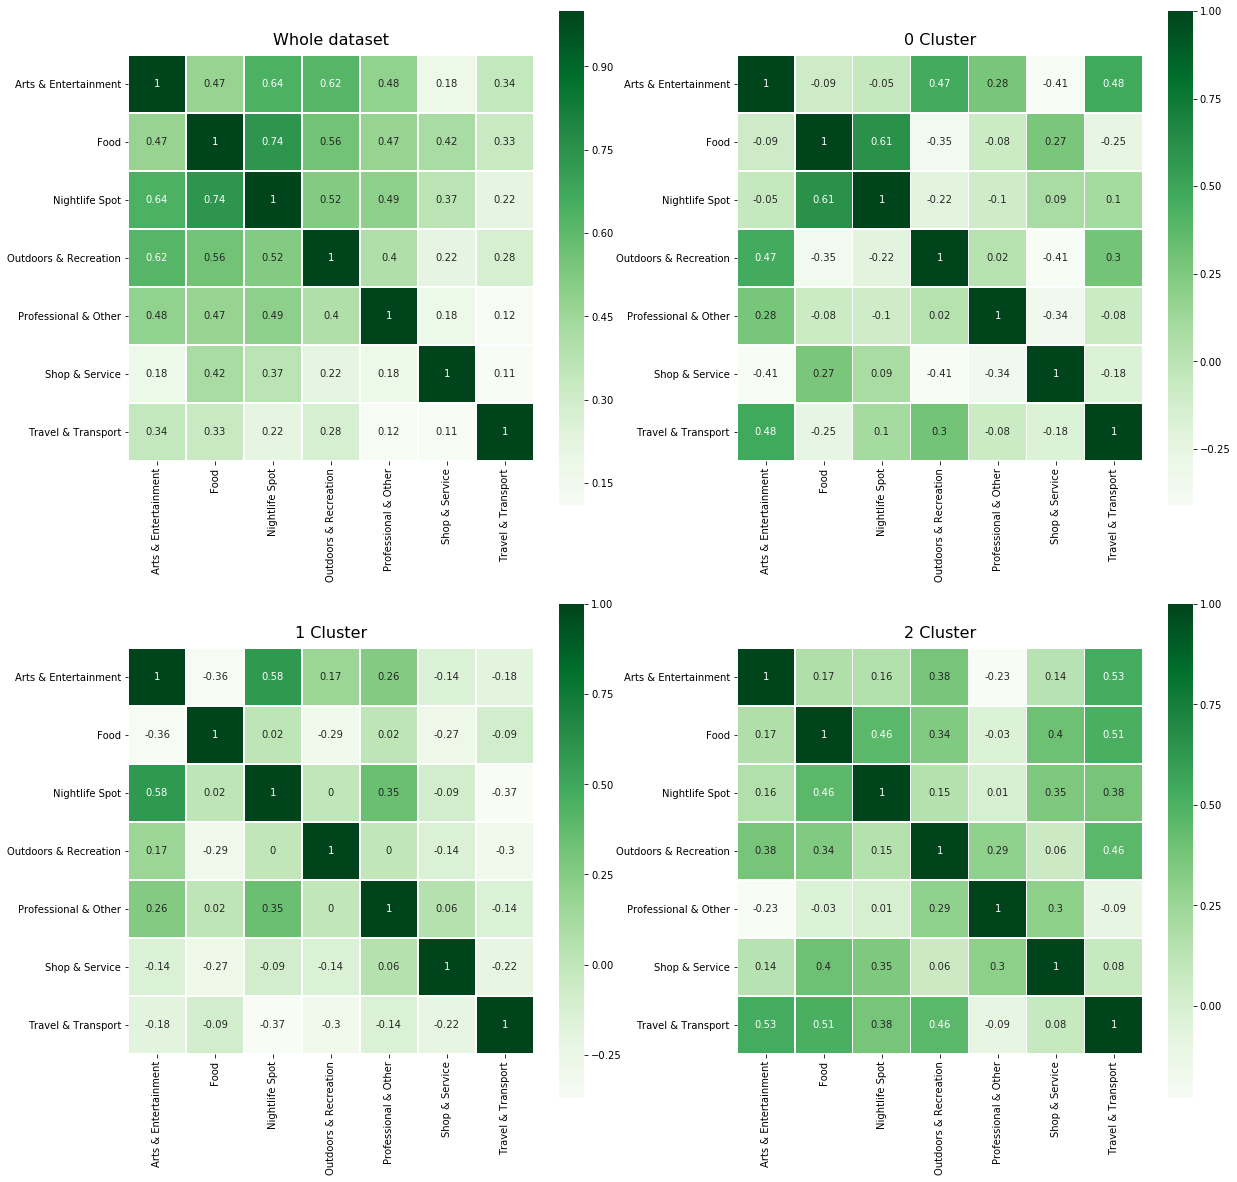

In [38]:
pivot_rename=pivot_clustering.rename(columns={'Venue_Arts & Entertainment':'Arts & Entertainment',
                     'Venue_Food':'Food',
                     'Venue_Nightlife Spot':'Nightlife Spot',
                     'Venue_Outdoors & Recreation':'Outdoors & Recreation',
                     'Venue_Professional & Other Places':'Professional & Other',
                     'Venue_Shop & Service':'Shop & Service',
                     'Venue_Travel & Transport':'Travel & Transport'})

within_corr=pivot_rename.copy()
within_corr['Clusters']=labels

cor0=within_corr.loc[within_corr['Clusters'] == 0].drop(['Clusters'], axis=1)
cor1=within_corr.loc[within_corr['Clusters'] == 1].drop(['Clusters'], axis=1)
cor2=within_corr.loc[within_corr['Clusters'] == 2].drop(['Clusters'], axis=1)


fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

zer=sns.heatmap(pivot_rename.corr().round(2), annot = True, linewidths=0.5, ax=ax1, square=True, cmap='Greens') 
bottom, top = zer.get_ylim()
zer.set_ylim(bottom + 0.5, top - 0.5)
zer.set_title('Whole dataset', fontsize=16, pad=10)

one=sns.heatmap(cor0.corr().round(2), annot = True, linewidths=0.5, ax=ax2, square=True, cmap='Greens') 
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
one.set_title('0 Cluster', fontsize=16, pad=10)

two=sns.heatmap(cor1.corr().round(2), annot = True, linewidths=0.5, ax=ax3, square=True, cmap='Greens') 
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
two.set_title('1 Cluster', fontsize=16, pad=10)

thr=sns.heatmap(cor2.corr().round(2), annot = True, linewidths=0.5, ax=ax4, square=True, cmap='Greens') 
bottom, top = thr.get_ylim()
thr.set_ylim(bottom + 0.5, top - 0.5)
thr.set_title('2 Cluster', fontsize=16, pad=10)



(3.0, 0.0)

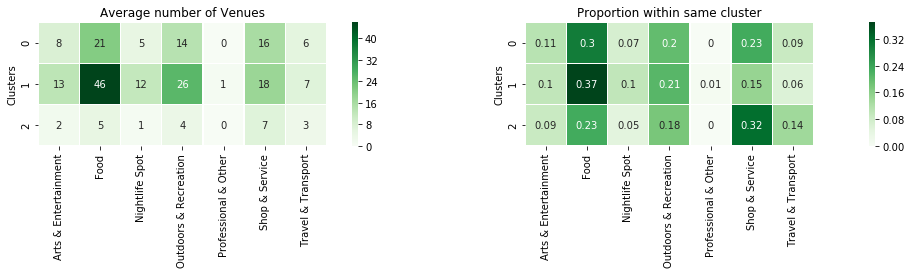

In [39]:
avgv1=pd.DataFrame(avgv.drop(['All venues'], axis=1))

avgvdiv=avgv[['Arts & Entertainment',
                      'Food', 'Nightlife Spot',
                      'Outdoors & Recreation', 'Professional & Other',
                       'Shop & Service', 'Travel & Transport']].div(avgv['All venues'],axis=0).round(2)

fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(221)
ax1.set_title('Average number of Venues')
ax2 = fig.add_subplot(211)
ax2.set_title('Proportion within same cluster')
one=sns.heatmap(avgv1, cmap='Greens', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax1)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
two=sns.heatmap(avgvdiv, cmap='Greens', linewidths=0.5, annot=True, fmt='g', ax=ax2, square=True)
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)



In [40]:
# create dataset with cluster+city, sort by cluster:

avgc=pd.pivot_table(df_fin,values=['Population','City age','Venue_Arts & Entertainment', 
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport','All_venues'], 
                       index=['Clusters','City'], aggfunc='mean').round(0)
avgc.columns = avg.columns.to_series().str.join('')
avgc.head()

All venues  City age  Population  Arts & Entertainment  \
Clusters City                                                                  
0        Flensburg          89.0     736.0       87432                   2.0   
         Greifswald         53.0     770.0       57985                   4.0   
         Halmstad           86.0     713.0       66124                   5.0   
         Hanko              45.0     146.0        8578                   2.0   
         Kaliningrad        96.0     765.0      448548                  17.0   

                      Food  Nightlife Spot  Outdoors & Recreation  \
Clusters City                                                       
0        Flensburg    27.0            10.0                    4.0   
         Greifswald   16.0             1.0                    3.0   
         Halmstad     31.0            10.0                   12.0   
         Hanko        20.0             3.0                    7.0   
         Kaliningrad  26.0             9.0                   12.0   

                      Professional & Other  Shop & Service  Travel & Transport  
Clusters City                                                                   
0        Flensburg                     0.0            39.0                 7.0  
         Greifswald                    0.0            25.0                 4.0  
         Halmstad                      0.0            22.0                 6.0  
         Hanko                         0.0             8.0                 5.0  
         Kaliningrad                   0.0            22.0                10.0

(100.0, 0.0)

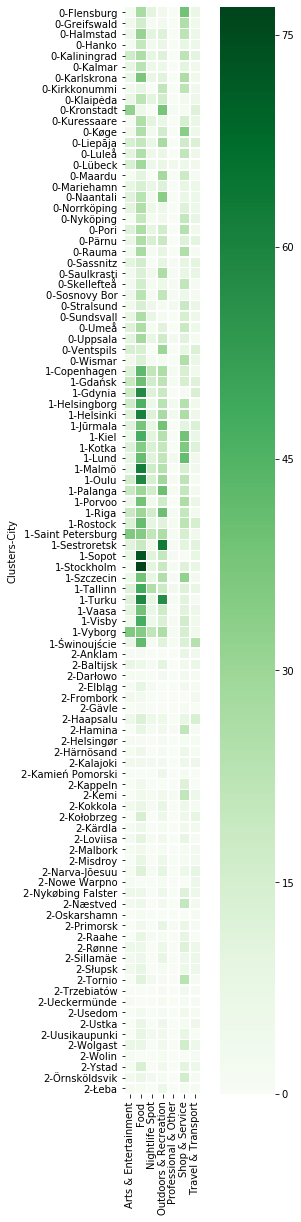

In [41]:
fig = plt.figure(figsize = (7,20))
#ax1 = fig.add_subplot(411)
#ax2 = fig.add_subplot(421)
#ax3 = fig.add_subplot(441)

avgcv=pd.DataFrame(avgc.filter(['Arts & Entertainment',
                      'Food', 'Nightlife Spot',
                      'Outdoors & Recreation', 'Professional & Other',
                      'Shop & Service', 'Travel & Transport'], axis=1))



# We use ax parameter to tell seaborn which subplot to use for this plot
one=sns.heatmap(avgcv, cmap='Greens', linewidths=0.5, square=True)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)




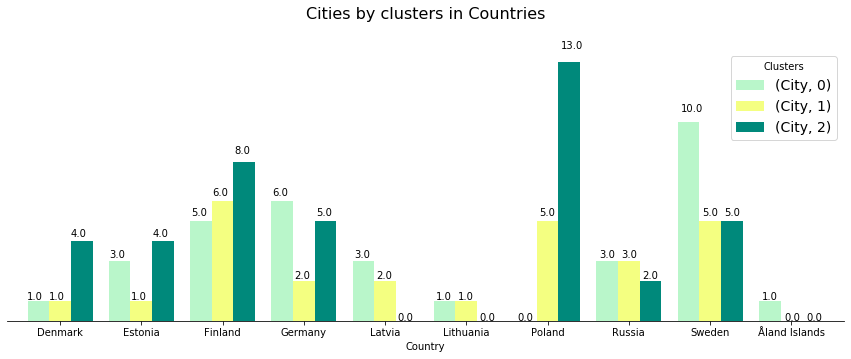

In [42]:
countries=pd.pivot_table(df_fin,values=['City'], columns=['Clusters'],
                        index=['Country'],aggfunc='count').round(0)


ax1 = countries.plot(kind='bar',
                  figsize = (15,5),
                  width=0.8,
                  color=(my_colours),
                  rot=0)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.legend(fontsize=14, title='Clusters')
ax1.get_yaxis().set_visible(False)
ax1.set_title('Cities by clusters in Countries', fontsize=16, pad=30)


for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))
    


_Splitting data into cluster-sets and analyzing outcomes by country._

In [43]:
cluster0=df_fin.loc[df_fin['Clusters'] == 0, df_fin.columns[list(range(0,4)) + list(range(6, df_fin.shape[1]))]]
cluster0.describe().round(2)
cluster0.head()

,City,Country,Founded,Population,City age,Venue_Arts & Entertainment,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Shop & Service,Venue_Travel & Transport,Clusters,All_venues
5,Flensburg,Germany,1284.0,87432,736.0,2.0,27.0,10.0,4.0,0.0,39.0,7.0,0,89.0
9,Greifswald,Germany,1250.0,57985,770.0,4.0,16.0,1.0,3.0,0.0,25.0,4.0,0,53.0
12,Halmstad,Sweden,1307.0,66124,713.0,5.0,31.0,10.0,12.0,0.0,22.0,6.0,0,86.0
14,Hanko,Finland,1874.0,8578,146.0,2.0,20.0,3.0,7.0,0.0,8.0,5.0,0,45.0
20,Kaliningrad,Russia,1255.0,448548,765.0,17.0,26.0,9.0,12.0,0.0,22.0,10.0,0,96.0


In [44]:
cl_0a=pd.pivot_table(cluster0,values=['Venue_Arts & Entertainment', 
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport'], 
                       index=['Country'], aggfunc='mean').round(0)
cl_0a.columns = cl_0a.columns.to_series().str.join('')

cl_0b=pd.pivot_table(cluster0,values=['City'], 
                        index=['Country'],aggfunc='count').round(0)
cl_0b.columns = cl_0b.columns.to_series().str.join('')


Text(0.5, 1, 'Average number of Venues per city')

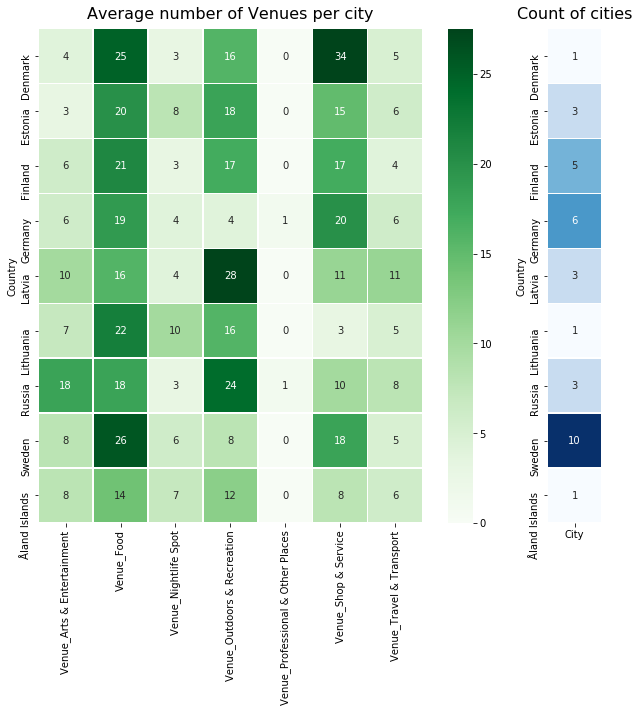

In [45]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(221)

# We use ax parameter to tell seaborn which subplot to use for this plot
one=sns.heatmap(cl_0b, cmap='Blues', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax1, robust=True, cbar=False)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
one.set_title('Count of cities', fontsize=16, pad=10)

two=sns.heatmap(cl_0a, cmap='Greens', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax2, robust=True)
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
two.set_title('Average number of Venues per city', fontsize=16, pad=10)



In [46]:
cluster1=df_fin.loc[df_fin['Clusters'] == 1, df_fin.columns[list(range(0,4)) + list(range(6, df_fin.shape[1]))]]
cluster1.describe().round(2)

,Founded,Population,City age,Venue_Arts & Entertainment,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Shop & Service,Venue_Travel & Transport,Clusters,All_venues
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.0,26.00
mean,1440.46,518342.73,579.54,13.04,45.50,11.88,26.04,1.46,18.35,7.27,1.0,123.54
std,311.00,1064305.57,311.00,8.28,13.53,6.00,12.61,1.14,10.37,5.23,0.0,15.73
min,897.00,15474.00,61.00,2.00,19.00,1.00,11.00,0.00,0.00,1.00,1.0,89.00
25%,1232.25,54459.00,308.75,7.25,38.25,8.00,19.00,0.25,12.00,4.00,1.0,119.00
50%,1323.00,194854.00,697.00,12.00,41.50,11.00,23.50,2.00,15.00,5.00,1.0,126.50
75%,1711.25,438284.25,787.75,16.75,55.50,16.00,26.75,2.00,23.50,10.25,1.0,130.00
max,1959.00,5323300.00,1123.00,36.00,77.00,25.00,63.00,4.00,41.00,24.00,1.0,151.00


In [47]:
cl_1a=pd.pivot_table(cluster1,values=['Venue_Arts & Entertainment', 
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport'], 
                       index=['Country'], aggfunc='mean').round(0)
cl_1a.columns = cl_1a.columns.to_series().str.join('')

cl_1b=pd.pivot_table(cluster1,values=['City'], 
                        index=['Country'],aggfunc='count').round(0)
cl_1b.columns = cl_1b.columns.to_series().str.join('')

Text(0.5, 1, 'Average number of Venues per city')

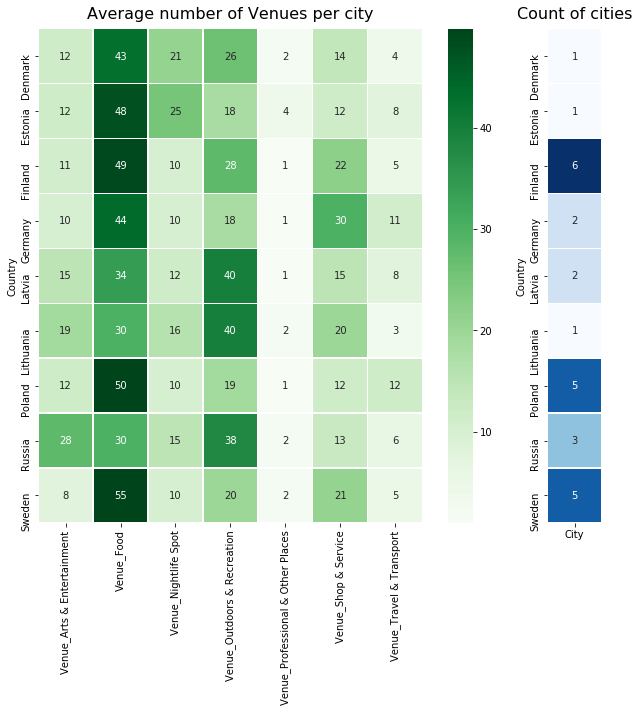

In [48]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(221)

# We use ax parameter to tell seaborn which subplot to use for this plot
one=sns.heatmap(cl_1b, cmap='Blues', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax1, robust=True, cbar=False)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
one.set_title('Count of cities', fontsize=16, pad=10)

two=sns.heatmap(cl_1a, cmap='Greens', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax2, robust=True)
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
two.set_title('Average number of Venues per city', fontsize=16, pad=10)



In [49]:
cluster2=df_fin.loc[df_fin['Clusters'] == 2, df_fin.columns[list(range(0,4)) + list(range(6, df_fin.shape[1]))]]
cluster2.describe().round(2)

,Founded,Population,City age,Venue_Arts & Entertainment,Venue_Food,Venue_Nightlife Spot,Venue_Outdoors & Recreation,Venue_Professional & Other Places,Venue_Shop & Service,Venue_Travel & Transport,Clusters,All_venues
count,40.00,41.00,40.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.0,41.00
mean,1420.18,23746.05,599.83,1.88,5.46,0.68,3.51,0.10,6.98,3.27,2.0,21.88
std,204.31,25799.83,204.31,2.16,3.99,1.29,2.75,0.37,6.29,2.96,0.0,12.84
min,1135.00,1170.00,151.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0,2.00
25%,1272.50,8696.00,427.00,0.00,2.00,0.00,2.00,0.00,2.00,1.00,2.0,12.00
50%,1350.00,15140.00,670.00,1.00,5.00,0.00,3.00,0.00,5.00,2.00,2.0,20.00
75%,1593.00,28985.00,747.50,3.00,8.00,1.00,5.00,0.00,9.00,5.00,2.0,35.00
max,1869.00,124257.00,885.00,8.00,15.00,6.00,10.00,2.00,23.00,14.00,2.0,52.00


In [50]:
cl_2a=pd.pivot_table(cluster2,values=['Venue_Arts & Entertainment', 
                                         'Venue_Food', 'Venue_Nightlife Spot',
                                         'Venue_Outdoors & Recreation', 'Venue_Professional & Other Places',
                                         'Venue_Shop & Service', 'Venue_Travel & Transport'], 
                       index=['Country'], aggfunc='mean').round(0)
cl_2a.columns = cl_2a.columns.to_series().str.join('')

cl_2b=pd.pivot_table(cluster2,values=['City'], 
                        index=['Country'],aggfunc='count').round(0)
cl_2b.columns = cl_2b.columns.to_series().str.join('')

Text(0.5, 1, 'Average number of Venues per city')

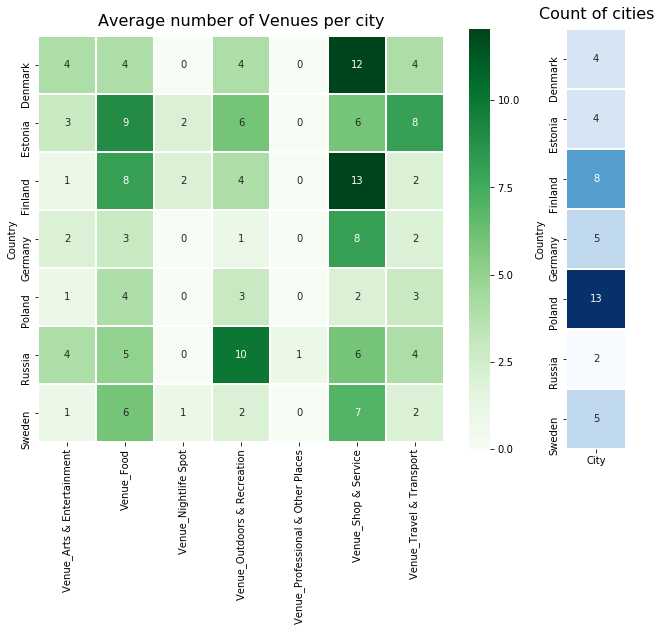

In [51]:
fig = plt.figure(figsize = (20,17))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(221)

# We use ax parameter to tell seaborn which subplot to use for this plot
one=sns.heatmap(cl_2b, cmap='Blues', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax1, robust=True, cbar=False)
bottom, top = one.get_ylim()
one.set_ylim(bottom + 0.5, top - 0.5)
one.set_title('Count of cities', fontsize=16, pad=10)

two=sns.heatmap(cl_2a, cmap='Greens', linewidths=0.5, annot=True, fmt='g', square=True, ax=ax2, robust=True)
bottom, top = two.get_ylim()
two.set_ylim(bottom + 0.5, top - 0.5)
two.set_title('Average number of Venues per city', fontsize=16, pad=10)



# 4. Conclusion


_The main objective of this project was to analyze cities located by the coast of Baltic Sea in order to provide information to travellers how to choose preferred city. We ended up with three clusters combining cities by their size. Cluster 0 contained the most venues equiped cities, while cluster 2 contained the least venue filled cities. Cluster 1 landed in the middle of those two. Cluster 0 holds the biggest variaty of venues as a result, might be more crowded compared to cities in other clusters. Cluster 1 has slight prefference on Outdoor and Recreation venues while Cluster 2 holding the smallest cities within, has some prefference on Shop and Service venues so are suitable for more autonomous and calm rest.
To summarize, Baltic Sea region seem to be quite deverse by number of countries, by type of cities and everyone might find the place they would like there._   
